Import and Install libraries

In [23]:
!pip install keras matplotlib tensorflow

In [5]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Normalize

In [6]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

To_categorical

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Creation

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) #3 is for RGB channels
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


Run Model and Compile

In [9]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1631 - loss: 2.6133 - val_accuracy: 0.1758 - val_loss: 2.0769
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1797 - loss: 2.0643 - val_accuracy: 0.1859 - val_loss: 2.0574
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1839 - loss: 2.0615 - val_accuracy: 0.1800 - val_loss: 2.0625
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1804 - loss: 2.0596 - val_accuracy: 0.1680 - val_loss: 2.0586
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1851 - loss: 2.0565 - val_accuracy: 0.1794 - val_loss: 2.0498
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1785 - loss: 2.0616 - val_accuracy: 0.1611 - val_loss: 2.1117
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1825 - loss: 2.0606 - val_accuracy: 0.1777 - val_loss: 2.0688
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1822 - loss: 2.0619 - val_accuracy: 0.

Test and Prediction

In [10]:
(loss , accuracy) = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1706 - loss: 2.0746
Test Loss: 2.07
Test Accuracy: 17.06%
{'accuracy': [0.163100004196167, 0.179749995470047, 0.1838500052690506, 0.1804250031709671, 0.18514999747276306, 0.17845000326633453, 0.18252499401569366, 0.18217499554157257, 0.18617500364780426, 0.18264999985694885], 'loss': [2.613283157348633, 2.064263343811035, 2.061506986618042, 2.059553623199463, 2.056515693664551, 2.061555862426758, 2.0606446266174316, 2.0619168281555176, 2.055448532104492, 2.05557918548584], 'val_accuracy': [0.17579999566078186, 0.1859000027179718, 0.18000000715255737, 0.1679999977350235, 0.1793999969959259, 0.16110000014305115, 0.1776999980211258, 0.17520000040531158, 0.181099995970726, 0.16899999976158142], 'val_loss': [2.0769455432891846, 2.057436227798462, 2.0625293254852295, 2.058635711669922, 2.0498290061950684, 2.1116673946380615, 2.0687990188598633, 2.052217721939087, 2.0703110694885254, 2.079690933227539]}


PLOT

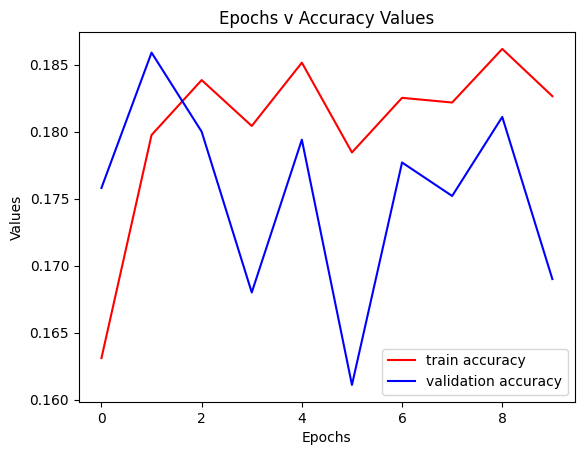

In [11]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

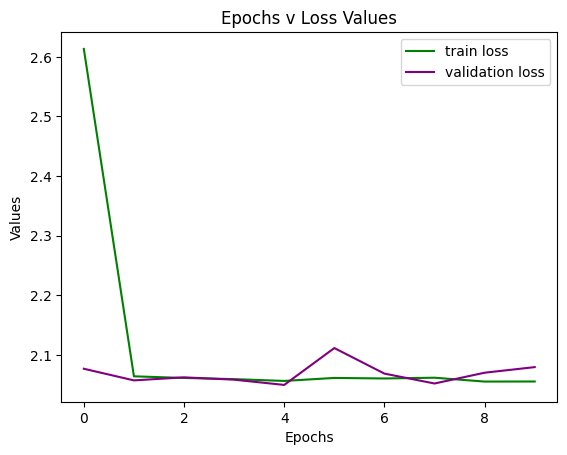

In [12]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()